In [287]:
## Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [288]:
## Import CSV File
team_summaries_df = pd.read_csv("Team Summaries.csv")
team_total_df = pd.read_csv("Team Totals.csv")
team_df = pd.merge(team_total_df, team_summaries_df, how='outer')
team_df.head()
pd.set_option('display.max_columns', 500)

team_df



,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts,age,w,l,pw,pl,mov,sos,srs,o_rtg,d_rtg,n_rtg,pace,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2024,NBA,Atlanta Hawks,ATL,False,47.0,11355.0,2037.0,4386.0,0.464,639.0,1772.0,0.361,1398.0,2614.0,0.535,955.0,1176.0,0.812,614.0,1493.0,2107.0,1215.0,371.0,207.0,648.0,892.0,5668.0,26.2,20.0,27.0,20.0,27.0,-2.68,-0.15,-2.83,118.2,120.8,-2.6,101.4,0.268,0.404,0.578,0.537,11.7,28.2,0.218,0.578,12.6,73.9,0.199,State Farm Arena,387786.0,16860.0
1,2024,NBA,Boston Celtics,BOS,False,48.0,11645.0,2069.0,4331.0,0.478,777.0,2044.0,0.380,1292.0,2287.0,0.565,864.0,1074.0,0.804,518.0,1747.0,2265.0,1234.0,306.0,312.0,602.0,823.0,5779.0,28.4,37.0,11.0,36.0,12.0,9.40,0.66,10.05,121.3,111.9,9.4,98.2,0.248,0.472,0.602,0.567,11.1,24.7,0.199,0.522,10.5,76.4,0.153,TD Garden,459744.0,19156.0
2,2024,NBA,Brooklyn Nets,BRK,False,47.0,11355.0,1977.0,4287.0,0.461,650.0,1779.0,0.365,1327.0,2508.0,0.529,762.0,1007.0,0.757,565.0,1558.0,2123.0,1249.0,326.0,253.0,598.0,904.0,5366.0,26.5,19.0,28.0,22.0,25.0,-1.15,-0.05,-1.20,115.8,117.0,-1.2,97.9,0.235,0.415,0.567,0.537,11.2,26.1,0.178,0.543,11.1,76.0,0.206,Barclays Center,438270.0,17531.0
3,2024,NBA,Chicago Bulls,CHI,False,49.0,11910.0,2030.0,4367.0,0.465,574.0,1608.0,0.357,1456.0,2759.0,0.528,804.0,1024.0,0.785,540.0,1579.0,2119.0,1199.0,377.0,254.0,606.0,936.0,5438.0,27.9,23.0,26.0,22.0,27.0,-1.43,-0.78,-2.20,113.8,115.3,-1.5,96.3,0.234,0.368,0.564,0.531,11.2,24.6,0.184,0.552,13.0,76.1,0.200,United Center,504866.0,20195.0
4,2024,NBA,Charlotte Hornets,CHO,False,46.0,11090.0,1877.0,4092.0,0.459,548.0,1525.0,0.359,1329.0,2567.0,0.518,693.0,881.0,0.787,484.0,1405.0,1889.0,1149.0,297.0,230.0,634.0,893.0,4995.0,25.2,10.0,36.0,9.0,37.0,-11.67,0.01,-11.67,110.1,122.0,-11.9,98.1,0.215,0.373,0.558,0.526,12.4,23.2,0.169,0.581,12.1,74.9,0.210,Spectrum Center,377284.0,16404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,1947,BAA,Providence Steamrollers,PRO,False,60.0,NaN,1629.0,5582.0,0.292,NaN,NaN,NaN,1629.0,5582.0,0.292,1092.0,1666.0,0.655,NaN,NaN,NaN,481.0,NaN,NaN,NaN,1215.0,4350.0,NaN,28.0,32.0,25.0,35.0,-1.67,0.15,-1.54,NaN,NaN,NaN,NaN,0.298,NaN,0.344,0.292,NaN,NaN,0.196,NaN,NaN,NaN,NaN,Rhode Island Auditorium,NaN,NaN
1841,1947,BAA,St. Louis Bombers,STB,True,61.0,NaN,1601.0,5877.0,0.272,NaN,NaN,NaN,1601.0,5877.0,0.272,862.0,1400.0,0.616,NaN,NaN,NaN,292.0,NaN,NaN,NaN,1234.0,4064.0,NaN,38.0,23.0,39.0,22.0,2.51,-0.18,2.34,NaN,NaN,NaN,NaN,0.238,NaN,0.313,0.272,NaN,NaN,0.147,NaN,NaN,NaN,NaN,St. Louis Arena,NaN,NaN
1842,1947,BAA,Toronto Huskies,TRH,False,60.0,NaN,1515.0,5672.0,0.267,NaN,NaN,NaN,1515.0,5672.0,0.267,966.0,1552.0,0.622,NaN,NaN,NaN,463.0,NaN,NaN,NaN,1271.0,3996.0,NaN,22.0,38.0,17.0,43.0,-4.43,0.39,-4.02,NaN,NaN,NaN,NaN,0.274,NaN,0.314,0.267,NaN,NaN,0.170,NaN,NaN,NaN,NaN,Maple Leaf Gardens,NaN,NaN
1843,1947,BAA,Washington Capitols,WSC,True,60.0,NaN,1723.0,5794.0,0.297,NaN,NaN,NaN,1723.0,5794.0,0.297,982.0,1391.0,0.706,NaN,NaN,NaN,378.0,NaN,NaN,NaN,1144.0,4428.0,NaN,49.0,11.0,53.0,7.0,9.87,-0.91,8.99,NaN,NaN,NaN,NaN,0.240,NaN,0.346,0.297,NaN,NaN,0.169,NaN,NaN,NaN,NaN,Uline Arena,NaN,NaN


In [289]:
#Clean/Downsize Data
team_df = team_df.dropna()
year = 2024
drop_2024_df = team_df[team_df['season'] != year]
team_reduced_df = drop_2024_df[["season", "team", "playoffs", "g", "fg_percent", "x3p_percent", "x2p_percent", "ft_percent", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pts", "w", "l", "srs", "o_rtg", "d_rtg", "n_rtg", "f_tr", "x3p_ar", "e_fg_percent", "tov_percent", "orb_percent"
]]
columns = {
    "season": "Season",
    "team": "Team",
    "playoffs": "Playoffs",
    "g": "Games Played",
    "fg_percent": "Field Goal Percentage",
    "x3p_percent": "Three-Point Percentage",
    "x2p_percent": "Two-Point Percentage",
    "ft_percent": "Free Throw Percentage",
    "orb": "Offensive Rebounds",
    "drb": "Defensive Rebounds",
    "trb": "Total Rebounds",
    "ast": "Assists",
    "stl": "Steals",
    "blk": "Blocks",
    "tov": "Turnovers",
    "pts": "Points",
    "w": "Wins",
    "l": "Losses",
    "srs": "Simple Rating System",
    "o_rtg": "Offensive Rating",
    "d_rtg": "Defensive Rating",
    "n_rtg": "Net Rating",
    "f_tr": "Free Throw Rate",
    "x3p_ar": "Three-Point Attempt Rate",
    "e_fg_percent": "Effective Field Goal Percentage",
    "tov_percent": "Turnover Percentage",
    "orb_percent": "Offensive Rebound Percentage"
}
team_reduced_df = team_reduced_df.rename(columns=columns)
team_reduced_df.head()


,Season,Team,Playoffs,Games Played,Field Goal Percentage,Three-Point Percentage,Two-Point Percentage,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Wins,Losses,Simple Rating System,Offensive Rating,Defensive Rating,Net Rating,Free Throw Rate,Three-Point Attempt Rate,Effective Field Goal Percentage,Turnover Percentage,Offensive Rebound Percentage
31,2023,Atlanta Hawks,False,82.0,0.483,0.352,0.548,0.818,920.0,2719.0,3639.0,2049.0,580.0,401.0,1060.0,9711.0,41.0,41.0,0.32,116.6,116.3,0.3,0.244,0.331,0.541,11.2,25.1
32,2023,Boston Celtics,False,82.0,0.475,0.377,0.567,0.812,796.0,2921.0,3717.0,2186.0,521.0,430.0,1095.0,9671.0,57.0,25.0,6.38,118.0,111.5,6.5,0.243,0.480,0.566,12.0,22.1
33,2023,Brooklyn Nets,False,82.0,0.487,0.378,0.559,0.800,674.0,2648.0,3322.0,2093.0,585.0,506.0,1127.0,9295.0,45.0,37.0,1.03,115.0,114.1,0.9,0.260,0.397,0.562,12.7,19.6
34,2023,Chicago Bulls,False,82.0,0.490,0.361,0.555,0.809,694.0,2779.0,3473.0,2006.0,644.0,371.0,1097.0,9276.0,40.0,42.0,1.37,113.5,112.2,1.3,0.251,0.333,0.550,12.2,20.1
35,2023,Charlotte Hornets,False,82.0,0.457,0.330,0.528,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,9098.0,27.0,55.0,-5.89,109.2,115.3,-6.1,0.261,0.360,0.516,12.3,23.8


In [290]:
#Adding exta columns for visiualications

#adding Assists per game
asists_per_game = team_reduced_df["Assists"]/team_reduced_df["Games Played"]
asists_per_game = asists_per_game.map("{:,.2f}".format)
team_reduced_df["Assists Per Game"] = asists_per_game

#adding Points per game
points_per_game = team_reduced_df["Points"]/team_reduced_df["Games Played"]
points_per_game = points_per_game.map("{:,.2f}".format)
team_reduced_df["Points Per Game"] = points_per_game

#adding Blocks per game
blocks_per_game = team_reduced_df["Blocks"]/team_reduced_df["Games Played"]
blocks_per_game = blocks_per_game.map("{:,.2f}".format)
team_reduced_df["Blocks Per Game"] = blocks_per_game

#adding Steals per game
steals_per_game = team_reduced_df["Steals"]/team_reduced_df["Games Played"]
steals_per_game = steals_per_game.map("{:,.2f}".format)
team_reduced_df["Steals Per Game"] = steals_per_game

#adding Offensive Rebounds Per Game
offensive_rebounds_per_game = team_reduced_df["Offensive Rebounds"]/team_reduced_df["Games Played"]
offensive_rebounds_per_game = offensive_rebounds_per_game.map("{:,.2f}".format)
team_reduced_df["Offensive Rebounds Per Game"] = offensive_rebounds_per_game

#adding Defensive Rebounds Per Game
defensive_rebounds_per_game = team_reduced_df["Defensive Rebounds"]/team_reduced_df["Games Played"]
defensive_rebounds_per_game = defensive_rebounds_per_game.map("{:,.2f}".format)
team_reduced_df["Defensive Rebounds Per Game"] = defensive_rebounds_per_game

team_reduced_df['Team Season'] = team_reduced_df['Team'] + ' ' + team_reduced_df['Season'].astype(str)

team_reduced_df.head()





,Season,Team,Playoffs,Games Played,Field Goal Percentage,Three-Point Percentage,Two-Point Percentage,Free Throw Percentage,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Wins,Losses,Simple Rating System,Offensive Rating,Defensive Rating,Net Rating,Free Throw Rate,Three-Point Attempt Rate,Effective Field Goal Percentage,Turnover Percentage,Offensive Rebound Percentage,Assists Per Game,Points Per Game,Blocks Per Game,Steals Per Game,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Team Season
31,2023,Atlanta Hawks,False,82.0,0.483,0.352,0.548,0.818,920.0,2719.0,3639.0,2049.0,580.0,401.0,1060.0,9711.0,41.0,41.0,0.32,116.6,116.3,0.3,0.244,0.331,0.541,11.2,25.1,24.99,118.43,4.89,7.07,11.22,33.16,Atlanta Hawks 2023
32,2023,Boston Celtics,False,82.0,0.475,0.377,0.567,0.812,796.0,2921.0,3717.0,2186.0,521.0,430.0,1095.0,9671.0,57.0,25.0,6.38,118.0,111.5,6.5,0.243,0.480,0.566,12.0,22.1,26.66,117.94,5.24,6.35,9.71,35.62,Boston Celtics 2023
33,2023,Brooklyn Nets,False,82.0,0.487,0.378,0.559,0.800,674.0,2648.0,3322.0,2093.0,585.0,506.0,1127.0,9295.0,45.0,37.0,1.03,115.0,114.1,0.9,0.260,0.397,0.562,12.7,19.6,25.52,113.35,6.17,7.13,8.22,32.29,Brooklyn Nets 2023
34,2023,Chicago Bulls,False,82.0,0.490,0.361,0.555,0.809,694.0,2779.0,3473.0,2006.0,644.0,371.0,1097.0,9276.0,40.0,42.0,1.37,113.5,112.2,1.3,0.251,0.333,0.550,12.2,20.1,24.46,113.12,4.52,7.85,8.46,33.89,Chicago Bulls 2023
35,2023,Charlotte Hornets,False,82.0,0.457,0.330,0.528,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,9098.0,27.0,55.0,-5.89,109.2,115.3,-6.1,0.261,0.360,0.516,12.3,23.8,25.15,110.95,5.18,7.73,10.99,33.55,Charlotte Hornets 2023


In [291]:
##Cleaning Offensive DF
offensive_df = team_reduced_df[["Team Season", "Playoffs", "Offensive Rating", "Points Per Game", "Field Goal Percentage", "Two-Point Percentage", "Three-Point Percentage", "Free Throw Percentage", "Offensive Rebounds Per Game", "Offensive Rebounds", "Offensive Rebound Percentage", "Assists Per Game", "Assists", "Wins", "Losses", "Free Throw Rate", "Three-Point Attempt Rate", "Effective Field Goal Percentage", "Turnover Percentage"]]
offensive_df

,Team Season,Playoffs,Offensive Rating,Points Per Game,Field Goal Percentage,Two-Point Percentage,Three-Point Percentage,Free Throw Percentage,Offensive Rebounds Per Game,Offensive Rebounds,Offensive Rebound Percentage,Assists Per Game,Assists,Wins,Losses,Free Throw Rate,Three-Point Attempt Rate,Effective Field Goal Percentage,Turnover Percentage
31,Atlanta Hawks 2023,False,116.6,118.43,0.483,0.548,0.352,0.818,11.22,920.0,25.1,24.99,2049.0,41.0,41.0,0.244,0.331,0.541,11.2
32,Boston Celtics 2023,False,118.0,117.94,0.475,0.567,0.377,0.812,9.71,796.0,22.1,26.66,2186.0,57.0,25.0,0.243,0.480,0.566,12.0
33,Brooklyn Nets 2023,False,115.0,113.35,0.487,0.559,0.378,0.800,8.22,674.0,19.6,25.52,2093.0,45.0,37.0,0.260,0.397,0.562,12.7
34,Chicago Bulls 2023,False,113.5,113.12,0.490,0.555,0.361,0.809,8.46,694.0,20.1,24.46,2006.0,40.0,42.0,0.251,0.333,0.550,12.2
35,Charlotte Hornets 2023,False,109.2,110.95,0.457,0.528,0.330,0.749,10.99,901.0,23.8,25.15,2062.0,27.0,55.0,0.261,0.360,0.516,12.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,New Jersey Nets 1982,True,103.0,106.66,0.484,0.490,0.205,0.728,14.56,1194.0,33.7,25.56,2096.0,44.0,38.0,0.326,0.020,0.487,16.6
1257,Denver Nuggets 1981,False,109.4,121.78,0.475,0.480,0.207,0.783,16.16,1325.0,33.1,24.76,2030.0,37.0,45.0,0.383,0.018,0.477,13.4
1265,New Jersey Nets 1981,False,101.0,106.93,0.475,0.480,0.246,0.751,13.32,1092.0,30.4,25.22,2068.0,24.0,58.0,0.324,0.019,0.478,16.6
1277,Boston Celtics 1980,True,109.4,113.45,0.490,0.496,0.384,0.779,14.96,1227.0,34.8,26.80,2198.0,61.0,21.0,0.332,0.057,0.501,15.4


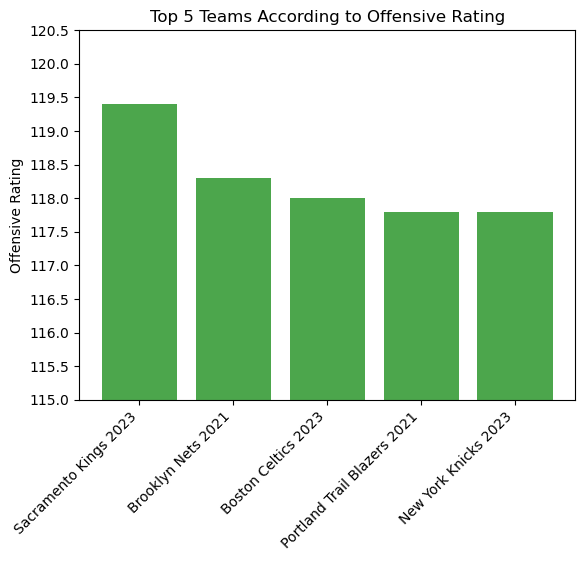

In [292]:
#Visulization Offense
#Offense by Offensive Rating

offensive_rating = offensive_df.sort_values('Offensive Rating', ascending=False)
offensive_rating = offensive_rating.head(5)

#Creating Bar Graph
plt.bar(offensive_rating['Team Season'], offensive_rating['Offensive Rating'], color='green', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(115, 120)
plt.yticks(np.arange(115, 121, 0.5))
plt.ylabel('Offensive Rating')
plt.title('Top 5 Teams According to Offensive Rating')
plt.show()

In [293]:
#Visulization Offense
#Points per Game

points_per_game = offensive_df.sort_values('Points Per Game', ascending=False)
points_per_game = points_per_game.head(5)
points_per_game

# #Creating Bar Graph
# plt.bar(best_points_per_game['Team Season'], best_points_per_game['Points Per Game'], color='green', alpha=0.7, align='center')
# plt.xticks(rotation=45, ha='right')
# plt.ylim(115, 120)
# plt.yticks(np.arange(115, 121, 0.5))
# plt.ylabel('Points Per Game')
# plt.title('Top 5 Teams According to Points Per Game')
# plt.show()

,Team Season,Playoffs,Offensive Rating,Points Per Game,Field Goal Percentage,Two-Point Percentage,Three-Point Percentage,Free Throw Percentage,Offensive Rebounds Per Game,Offensive Rebounds,Offensive Rebound Percentage,Assists Per Game,Assists,Wins,Losses,Free Throw Rate,Three-Point Attempt Rate,Effective Field Goal Percentage,Turnover Percentage
1218,New York Knicks 1983,True,102.4,99.98,0.482,0.486,0.252,0.710,13.17,1080.0,31.6,24.80,2034.0,44.0,38.0,0.336,0.019,0.484,16.2
360,New York Knicks 2013,True,111.1,99.95,0.448,0.487,0.376,0.759,10.85,890.0,25.6,19.26,1579.0,54.0,28.0,0.258,0.354,0.515,11.7
416,Memphis Grizzlies 2011,True,107.6,99.94,0.471,0.492,0.334,0.750,11.83,970.0,28.9,20.62,1691.0,46.0,36.0,0.291,0.136,0.493,13.0
572,Miami Heat 2006,True,108.7,99.89,0.478,0.517,0.345,0.700,10.46,858.0,26.7,20.63,1692.0,52.0,30.0,0.363,0.227,0.517,13.9
413,Indiana Pacers 2011,True,104.8,99.79,0.442,0.471,0.354,0.782,11.15,914.0,25.9,19.65,1611.0,37.0,45.0,0.300,0.244,0.486,14.1


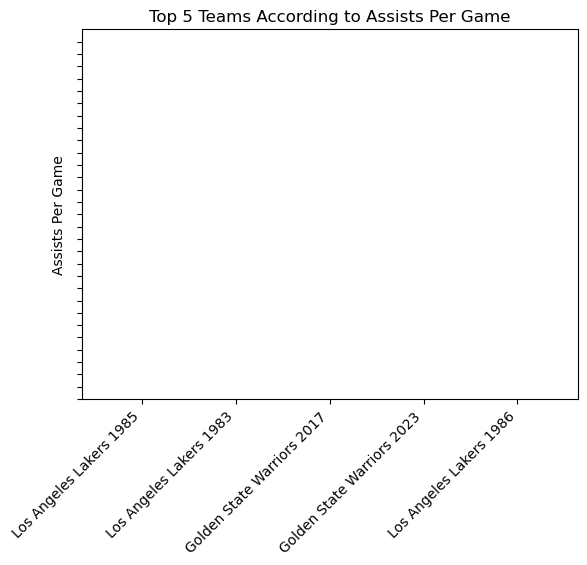

In [294]:
#Visulization Offense
#Assists per Game

assists_per_game = offensive_df.sort_values('Assists Per Game', ascending=False)
assists_per_game = assists_per_game.head(5)


#Creating Bar Graph
plt.bar(assists_per_game['Team Season'], assists_per_game['Assists Per Game'], color='green', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(20, 35)
plt.yticks(np.arange(20, 35, 0.5))
plt.ylabel('Assists Per Game')
plt.title('Top 5 Teams According to Assists Per Game')
plt.show()

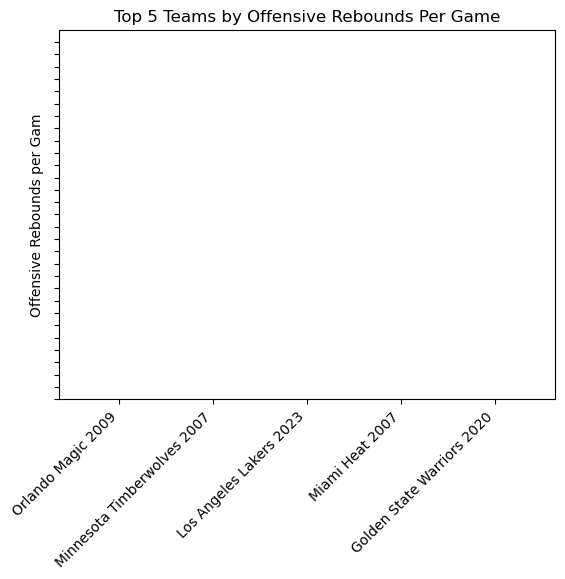

In [295]:
#Visulization Offense
#Offensive Rebounds per Game

off_reb_per_game = offensive_df.sort_values('Offensive Rebounds Per Game', ascending=False)
off_reb_per_game = off_reb_per_game.head(5)
off_reb_per_game

#Creating Bar Graph
plt.bar(off_reb_per_game['Team Season'], off_reb_per_game['Offensive Rebounds Per Game'], color='green', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(20, 35)
plt.yticks(np.arange(20, 35, 0.5))
plt.ylabel('Offensive Rebounds per Gam')
plt.title('Top 5 Teams by Offensive Rebounds Per Game')
plt.show()

In [296]:
##Cleaning Defensive
defensive_df = team_reduced_df[["Team Season", "Defensive Rebounds Per Game", "Defensive Rebounds", "Blocks Per Game", "Blocks", "Steals Per Game", "Steals", "Turnovers", "Losses", "Defensive Rating","Turnover Percentage"
]]
defensive_df = defensive_df.rename(columns=columns)
defensive_df.head()

,Team Season,Defensive Rebounds Per Game,Defensive Rebounds,Blocks Per Game,Blocks,Steals Per Game,Steals,Turnovers,Losses,Defensive Rating,Turnover Percentage
31,Atlanta Hawks 2023,33.16,2719.0,4.89,401.0,7.07,580.0,1060.0,41.0,116.3,11.2
32,Boston Celtics 2023,35.62,2921.0,5.24,430.0,6.35,521.0,1095.0,25.0,111.5,12.0
33,Brooklyn Nets 2023,32.29,2648.0,6.17,506.0,7.13,585.0,1127.0,37.0,114.1,12.7
34,Chicago Bulls 2023,33.89,2779.0,4.52,371.0,7.85,644.0,1097.0,42.0,112.2,12.2
35,Charlotte Hornets 2023,33.55,2751.0,5.18,425.0,7.73,634.0,1164.0,55.0,115.3,12.3


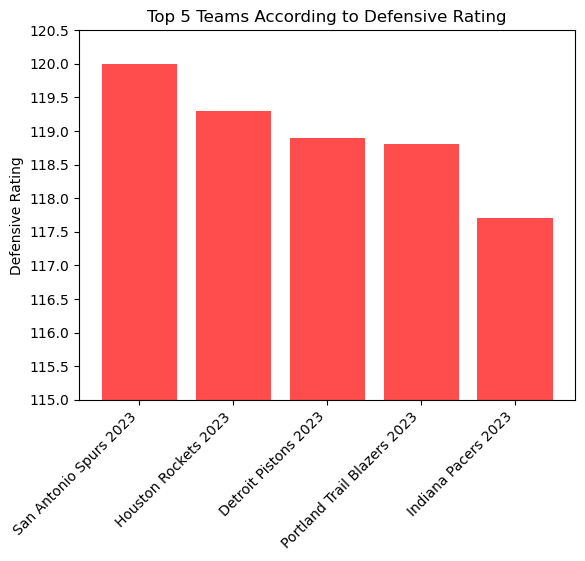

In [297]:
##Visulization Defense
#Defense by Defensive Rating

defensive_rating = defensive_df.sort_values('Defensive Rating', ascending=False)
defensive_rating = defensive_rating.head(5)

#Creating Bar Graph
plt.bar(defensive_rating['Team Season'], defensive_rating['Defensive Rating'], color='red', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(115, 120)
plt.yticks(np.arange(115, 121, 0.5))
plt.ylabel('Defensive Rating')
plt.title('Top 5 Teams According to Defensive Rating')
plt.show()



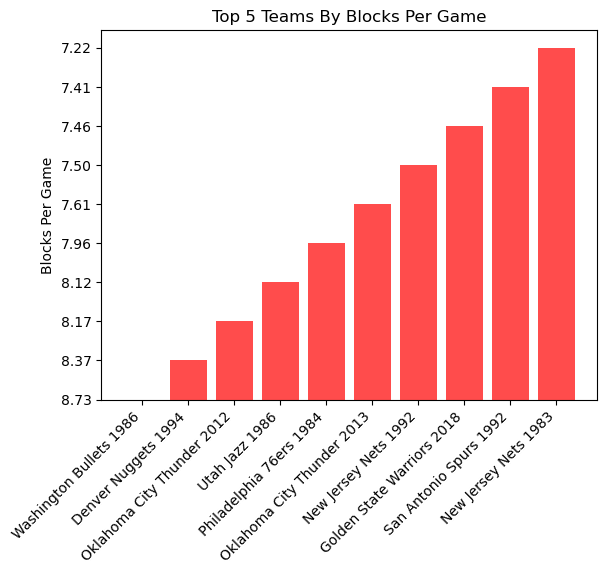

In [298]:
##Visulization Defense
#Defense by Blocks Per Game

defensive_blocks = defensive_df.sort_values('Blocks Per Game', ascending=False)
defensive_blocks = defensive_blocks.head(10)

#Creating Bar Graph
plt.bar(defensive_blocks['Team Season'], defensive_blocks['Blocks Per Game'], color='red', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
# plt.ylim(6, 10)
# plt.yticks(np.arange(6, 10, 0.5))
plt.ylabel('Blocks Per Game')
plt.title('Top 5 Teams By Blocks Per Game')
plt.show()

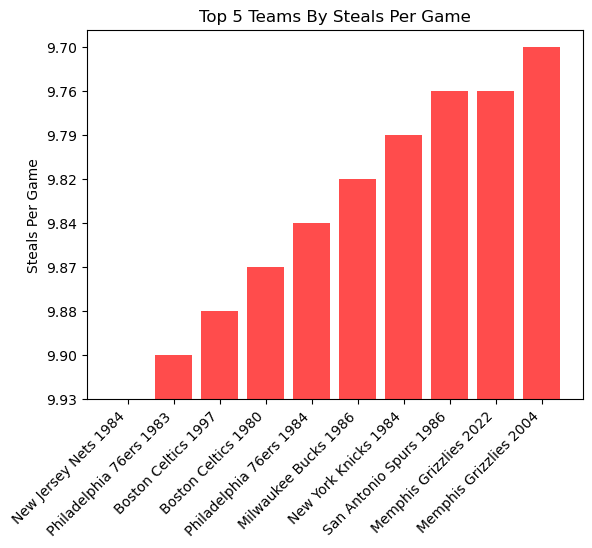

In [299]:
##Visulization Defense
#Defense by Steals Per Game

defensive_steals = defensive_df.sort_values('Steals Per Game', ascending=False)
defensive_steals = defensive_steals.head(10)

#defensive_steals

#Creating Bar Graph
plt.bar(defensive_steals['Team Season'], defensive_steals['Steals Per Game'], color='red', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
# plt.ylim(6, 10)
# plt.yticks(np.arange(6, 10, 0.5))
plt.ylabel('Steals Per Game')
plt.title('Top 5 Teams By Steals Per Game')
plt.show()

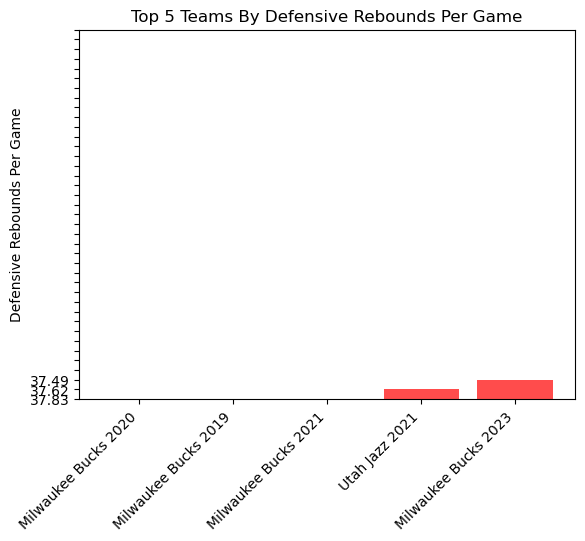

In [300]:
##Visulization Defense
#Defense by Defensive Rebounds Per Game

def_reb_per_game = defensive_df.sort_values('Defensive Rebounds Per Game', ascending=False)
def_reb_per_game = def_reb_per_game.head(5)

def_reb_per_game

#Creating Bar Graph
plt.bar(def_reb_per_game['Team Season'], def_reb_per_game['Defensive Rebounds Per Game'], color='red', alpha=0.7, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(2, 40)
plt.yticks(np.arange(2, 41, 1.0))
plt.ylabel('Defensive Rebounds Per Game')
plt.title('Top 5 Teams By Defensive Rebounds Per Game')
plt.show()

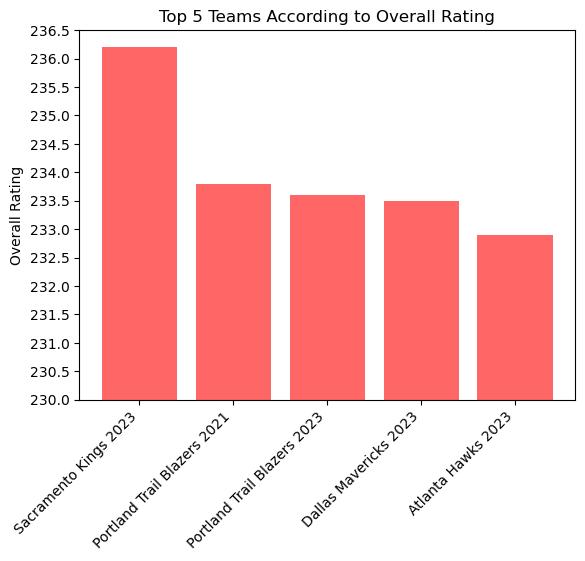

In [301]:
##Visualization Overall
##Sorting Data
team_reduced_df['Overall Rating'] = team_reduced_df['Offensive Rating'] + team_reduced_df['Defensive Rating']
team_rating = team_reduced_df.sort_values(by='Overall Rating', ascending=False)
team_rating['Team Season'] = team_rating['Team'] + ' ' + team_rating['Season'].astype(str)
best_overall = team_rating.head(5)


best_overall

##Creating Bar Graph
plt.bar(best_overall['Team Season'], best_overall['Overall Rating'], color='r', alpha=0.6, align='center')
plt.xticks(rotation=45, ha='right')
plt.ylim(230, 236.5)
plt.yticks(np.arange(230, 237, 0.5))
plt.ylabel('Overall Rating')
plt.title('Top 5 Teams According to Overall Rating')
plt.show()